The UK and Austria have had similar yet different experiences with covid19. Use the dataset
‘covid_UK_Austria.csv’ in the Week 2 folder and plot something that varies over time. Plots of
raw cases numbers are very common, so maybe consider something a bit more interesting!

Too easy? Try indicating the timing of certain events (lockdowns, vaccines) that might help tell
the story of why things have unfolded the way they have.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [53]:
df = pd.read_csv("Covid_UK_Austria.csv")
df.head(20)

# df.describe()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AUT,Europe,Austria,2/25/20,2,2,NaN,NaN,NaN,NaN,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
1,AUT,Europe,Austria,2/26/20,2,0,NaN,NaN,NaN,NaN,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
2,AUT,Europe,Austria,2/27/20,3,1,NaN,NaN,NaN,NaN,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
3,AUT,Europe,Austria,2/28/20,3,0,NaN,NaN,NaN,NaN,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
4,AUT,Europe,Austria,2/29/20,9,6,NaN,NaN,NaN,NaN,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
5,AUT,Europe,Austria,3/1/20,14,5,2.000,NaN,NaN,0.000,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
6,AUT,Europe,Austria,3/2/20,18,4,2.571,NaN,NaN,0.000,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
7,AUT,Europe,Austria,3/3/20,21,3,2.714,NaN,NaN,0.000,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
8,AUT,Europe,Austria,3/4/20,29,8,3.857,NaN,NaN,0.000,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
9,AUT,Europe,Austria,3/5/20,41,12,5.429,NaN,NaN,0.000,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922


In [89]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [90]:
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                                int64
new_cases                                  int64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [91]:
df.describe(include=object)

,iso_code,continent,location,date,tests_units
count,771,771,771,771,665
unique,2,1,2,398,1
top,GBR,Europe,United Kingdom,12/5/20,tests performed
freq,398,771,398,2,665


In [95]:
# new_cases = df.iloc[:,5]
df.new_cases

0         2
1         0
2         1
3         0
4         6
       ... 
766    7457
767    6055
768    5462
769    6411
770    6420
Name: new_cases, Length: 771, dtype: int64

In [96]:
df[['location', 'total_cases']]

,location,total_cases
0,Austria,2
1,Austria,2
2,Austria,3
3,Austria,3
4,Austria,9
...,...,...
766,United Kingdom,4182772
767,United Kingdom,4188827
768,United Kingdom,4194289
769,United Kingdom,4200700


In [99]:
df.location.unique()

array(['Austria', 'United Kingdom'], dtype=object)

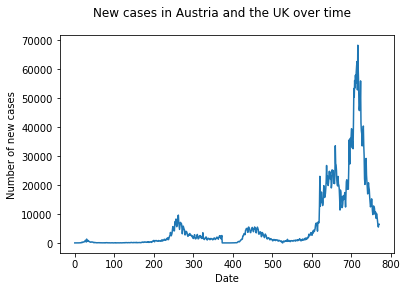

In [97]:
# Plot new cases in Austria and the UK
fig1 = plt.figure()
fig1.suptitle("New cases in Austria and the UK over time")
ax = fig1.add_subplot(1,1,1)
ax.set_xlabel("Date")
ax.set_ylabel("Number of new cases")
ax.plot(new_cases)
plt.show()

In [88]:
# Group by country
by_country = df.groupby("location")['new_cases']#.plot()
# new_cases_AT = by_country.get_group
by_country
# by_country.plot(column="new_cases")

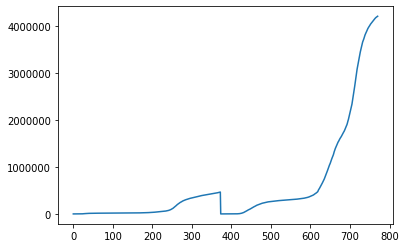

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df["total_cases"])

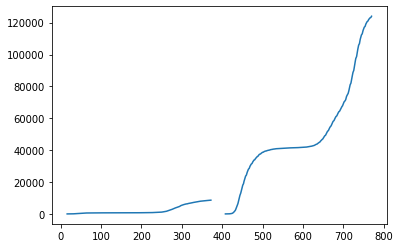

In [42]:
df["total_deaths"].plot()

In [73]:
# fig=px.imshow(df.iloc[350:400,5:10])
# fig.show()

df.iloc[350:400,5:10]
# df.iloc[0:100,5:10]

,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed
350,1197,1332.857,8071.0,39.0,32.000
351,1469,1325.571,8114.0,43.0,30.286
352,1577,1334.000,8138.0,24.0,28.857
353,1731,1383.000,8170.0,32.0,28.143
354,1433,1397.286,8195.0,25.0,28.714
355,1184,1378.286,8211.0,16.0,28.429
356,1225,1402.286,8221.0,10.0,27.000
357,1427,1435.143,8260.0,39.0,27.000
358,1735,1473.143,8290.0,30.0,25.143
359,1967,1528.857,8312.0,22.0,24.857


In [116]:
# cases.plot(cases.new_cases)
